In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn
import xgboost as xgb

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os



In [480]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [481]:
train=pd.read_csv('train.csv')

In [482]:
test=pd.read_csv('test.csv')

In [483]:
submission = pd.read_csv('gender_submission.csv')

# Data Exploration

In [484]:
print('Train data shape: ',train.shape)
train.head()

Train data shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [485]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [486]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [487]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [488]:
print('Test data shape: ',test.shape)
test.head()

Test data shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [489]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [490]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [491]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [492]:
train['Pclass'] = train['Pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
train['Embarked'] = train['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'})

# Visualize data

In [493]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [494]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

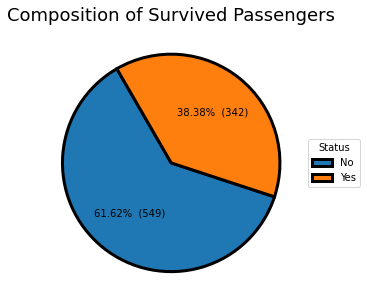

In [495]:
value_count=train.Survived.value_counts()

fig,ax=plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal"))
plt.title('Composition of Survived Passengers',fontsize=18)

data=[value_count[0],value_count[1]]

plt.pie(data,explode = (0,0),
        textprops=dict(size= 10, color= "black"),
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data)/100),startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))

label='No','Yes'
plt.legend(label,title='Status',loc='center',bbox_to_anchor=(1,0,0.2,1))


In [496]:
def stack_plot(data, xtick, col2='Survived', col3='total'):  #define for ditribution data
   ind = np.arange(data.shape[0])

   if len(data[xtick].unique())<5:
      plt.figure(figsize=(5,5))
   elif len(data[xtick].unique())>=5 & len(data[xtick].unique())<10:
       plt.figure(figsize=(7,7))
   else:
      plt.figure(figsize=(10,10))
    
   p1 = plt.bar(ind, data[col3].values)
   p2 = plt.bar(ind, data[col2].values)
   
   plt.ylabel('Count')

   plt.xticks(ticks=ind, rotation=90,labels= list(data[xtick].values))
   plt.legend((p1[0], p2[0]), ( 'Not Survived','Yes'))
 
   plt.show()

def barplots(data, col1, col2='Survived', top=True):
   temp = pd.DataFrame(train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

   temp['total'] = pd.DataFrame(train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
   temp['Avg'] = pd.DataFrame(train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
   
   stack_plot(temp, xtick=col1, col2=col2, col3='total')
   print(temp)
    

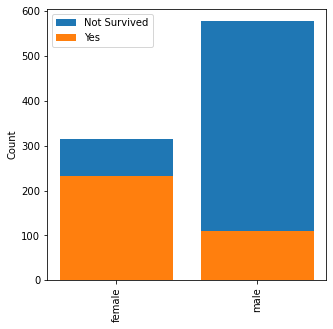

      Sex  Survived  total       Avg
0  female       233    314  0.742038
1    male       109    577  0.188908


In [497]:
barplots(data,'Sex','Survived')


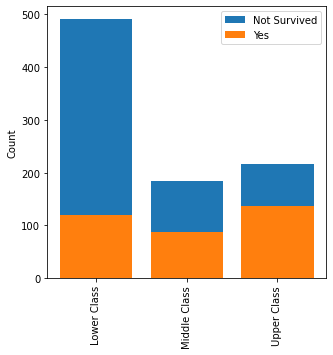

         Pclass  Survived  total       Avg
0   Lower Class       119    491  0.242363
1  Middle Class        87    184  0.472826
2   Upper Class       136    216  0.629630


In [498]:
barplots(data,'Pclass','Survived')

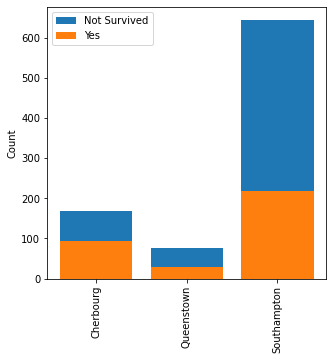

      Embarked  Survived  total       Avg
0    Cherbourg        93    168  0.553571
1   Queenstown        30     77  0.389610
2  Southampton       217    644  0.336957


In [499]:
barplots(data,'Embarked','Survived')

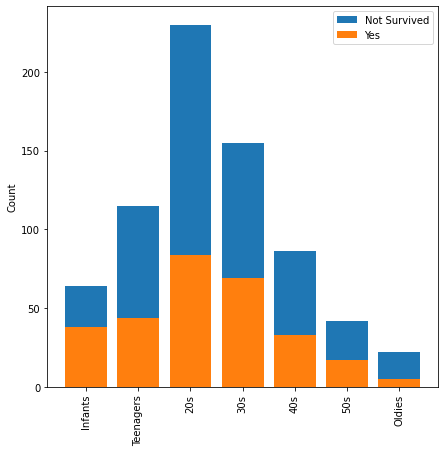

   age_group  Survived  total       Avg
0    Infants        38     64  0.593750
1  Teenagers        44    115  0.382609
2        20s        84    230  0.365217
3        30s        69    155  0.445161
4        40s        33     86  0.383721
5        50s        17     42  0.404762
6     Oldies         5     22  0.227273


In [500]:
age_labels = ['Infants', 'Teenagers', '20s', '30s', '40s', '50s', 'Oldies']
train['age_group'] = pd.cut(train['Age'],bins=[0,10, 20, 30, 40, 50, 60, 80], labels=age_labels)

barplots(data,'age_group','Survived')

# Data Prep

In [501]:
missing_data=train.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Age          177
Cabin        687
Embarked       2
age_group    177
dtype: int64

In [502]:
#handling missing data

train.Cabin.fillna('Data Unavailable',inplace=True)
train.Age.fillna(train.Age.mean(),inplace=True)

train.Embarked.fillna('Data Unavailable',inplace=True)

In [503]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Data Unavailable,Southampton,20s
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,30s
2,3,1,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Data Unavailable,Southampton,20s
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,30s
4,5,0,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Data Unavailable,Southampton,30s


In [504]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_group'],
      dtype='object')

In [505]:
df=train

In [506]:
df=df.drop(['PassengerId'],axis=1)
df=df.drop(['Name'],axis=1)
df=df.drop(['age_group'],axis=1)
df=df.drop(['Ticket'],axis=1)


In [507]:
df = df.drop(['Cabin'],1)

In [508]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Lower Class,male,22.000000,1,0,7.2500,Southampton
1,1,Upper Class,female,38.000000,1,0,71.2833,Cherbourg
2,1,Lower Class,female,26.000000,0,0,7.9250,Southampton
3,1,Upper Class,female,35.000000,1,0,53.1000,Southampton
4,0,Lower Class,male,35.000000,0,0,8.0500,Southampton
5,0,Lower Class,male,29.699118,0,0,8.4583,Queenstown
6,0,Upper Class,male,54.000000,0,0,51.8625,Southampton
7,0,Lower Class,male,2.000000,3,1,21.0750,Southampton
8,1,Lower Class,female,27.000000,0,2,11.1333,Southampton
9,1,Middle Class,female,14.000000,1,0,30.0708,Cherbourg


In [509]:
le=LabelEncoder()
catcol = [col for col in df.columns if df[col].dtype == "object"] #encoding data
label_mapping = {}
for col in catcol:
    df[col]=le.fit_transform(df[col])
    label_mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))

label_mapping

{'Pclass': {'Lower Class': 0, 'Middle Class': 1, 'Upper Class': 2},
 'Sex': {'female': 0, 'male': 1},
 'Embarked': {'Cherbourg': 0,
  'Data Unavailable': 1,
  'Queenstown': 2,
  'Southampton': 3}}

Correlation

In [510]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,22.000000,1,0,7.2500,3
1,1,2,0,38.000000,1,0,71.2833,0
2,1,0,0,26.000000,0,0,7.9250,3
3,1,2,0,35.000000,1,0,53.1000,3
4,0,0,1,35.000000,0,0,8.0500,3
5,0,0,1,29.699118,0,0,8.4583,2
6,0,2,1,54.000000,0,0,51.8625,3
7,0,0,1,2.000000,3,1,21.0750,3
8,1,0,0,27.000000,0,2,11.1333,3
9,1,1,0,14.000000,1,0,30.0708,0


In [511]:
df2=df.corr().Survived.sort_values(ascending=False).reset_index()
df2

,index,Survived
0,Survived,1.000000
1,Pclass,0.338481
2,Fare,0.257307
3,Parch,0.081629
4,SibSp,-0.035322
5,Age,-0.069809
6,Embarked,-0.174963
7,Sex,-0.543351


Text(0.5, 1.0, '\nHeatmap for correlation\n')

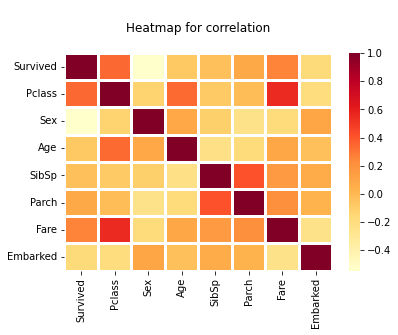

In [512]:
sns.heatmap(df.corr(),cmap="YlOrRd", edgecolor = "#1c1c1c", linewidth = 3)
plt.title(f'\nHeatmap for correlation\n')

Train Test Split

In [513]:
X=df.drop(['Survived'],1)
y=df.Survived.values.reshape(-1,1)

from imblearn.over_sampling import RandomOverSampler


oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [514]:
train_X,test_X,train_y,test_y=train_test_split(X_over,y_over,test_size=0.2,random_state=0)

# Machine Learning Modelling

In [515]:

dtr=DecisionTreeClassifier()

dtr.fit(train_X,train_y)
crosval=cross_val_score(dtr,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.8352386882523868


<AxesSubplot:>

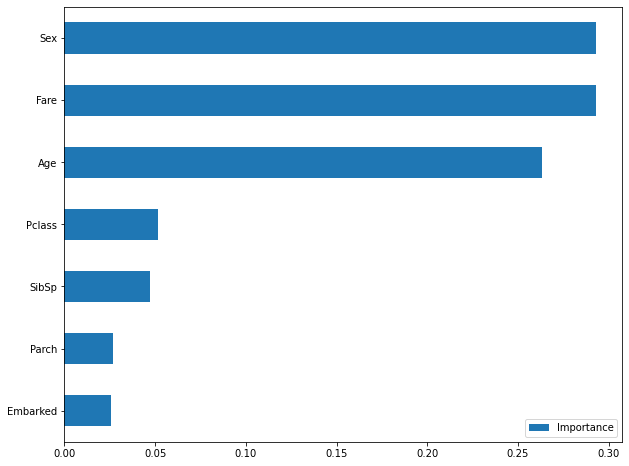

In [516]:
feat_importances = pd.DataFrame(dtr.feature_importances_, index=test_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))


In [517]:
dtr_pred=dtr.predict(test_X)
dtr_conf=confusion_matrix(test_y,dtr_pred)
dtr_report=classification_report(test_y,dtr_pred)
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3)
dtr_rocauc=roc_auc_score(test_y, dtr_pred)
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[91 21]
 [15 93]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       112
           1       0.82      0.86      0.84       108

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220


The Accuracy of Decision Tree is 83.636 %
ROC AUC Score with Decision Tree: 0.8368055555555556


In [518]:
rfc = RandomForestClassifier() 
rfc.fit(train_X,train_y)
crosval=cross_val_score(rfc,X_over,y_over,cv=3)
print('Score: ',crosval.mean())

Score:  0.8442622950819673


In [519]:
rfc_pred = rfc.predict(test_X)
rfc_conf = confusion_matrix(test_y, rfc_pred)
rfc_report = classification_report(test_y, rfc_pred)
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2)
rfc_rocauc=roc_auc_score(test_y, rfc_pred)
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest Classifier: {rfc_rocauc}')

Confusion Matrix : 

[[93 19]
 [11 97]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.84      0.90      0.87       108

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220


The Accuracy of Random Forest Classifier is 86.36 %
ROC AUC score wiht Random Forest Classifier: 0.8642526455026454


In [520]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
crosval=cross_val_score(lr,X_over,y_over,cv=6)
print('Score: ',crosval.mean())

Score:  0.773224043715847


In [521]:
lr_pred = rfc.predict(test_X)
lr_conf = confusion_matrix(test_y, lr_pred)
lr_report = classification_report(test_y, lr_pred)
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2)
lr_rocauc=roc_auc_score(test_y, lr_pred)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Regresion: {lr_rocauc}')

Confusion Matrix : 

[[93 19]
 [11 97]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.84      0.90      0.87       108

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220


The Accuracy of Logistic Regresion is 86.36 %
ROC AUC score wiht Logistic Regresion: 0.8642526455026454


In [522]:
gradien=GradientBoostingClassifier()

gradien.fit(train_X,train_y)
crosval=cross_val_score(gradien,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.8360979659609796


In [523]:
gradien_pred=gradien.predict(test_X)
gradien_conf=confusion_matrix(test_y,gradien_pred)
gradien_report=classification_report(test_y,gradien_pred)
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3)
gradien_rocauc=roc_auc_score(test_y, gradien_pred)
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[90 22]
 [19 89]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       112
           1       0.80      0.82      0.81       108

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220


The Accuracy of Gradien Boost is 81.364 %
ROC AUC score wiht Gradien Boost: 0.8138227513227513


In [524]:
sgd=SGDClassifier()

sgd.fit(train_X,train_y)
crosval=cross_val_score(sgd,X_over,y_over,cv=10)
print('Score: ',crosval.mean())

Score:  0.7185904920767305


In [525]:
sgd_pred=sgd.predict(test_X)
sgd_conf=confusion_matrix(test_y,sgd_pred)
sgd_report=classification_report(test_y,sgd_pred)
sgd_acc=round(accuracy_score(test_y,sgd_pred)*100,ndigits=3)
sgd_rocauc=roc_auc_score(test_y, sgd_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")
print(f"\nClassification Report : \n\n{sgd_report}")
print(f"\nThe Accuracy of SGD is {sgd_acc} %")
print(f'ROC AUC Score with SGD: {sgd_rocauc}')

Confusion Matrix : 

[[35 77]
 [10 98]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.31      0.45       112
           1       0.56      0.91      0.69       108

    accuracy                           0.60       220
   macro avg       0.67      0.61      0.57       220
weighted avg       0.67      0.60      0.57       220


The Accuracy of SGD is 60.455 %
ROC AUC Score with SGD: 0.6099537037037037


In [526]:
gnb=GaussianNB()

gnb.fit(train_X,train_y)
crosval=cross_val_score(gnb,X_over,y_over,cv=3)
print('Score: ',crosval.mean())

Score:  0.7723132969034608


In [527]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[92 20]
 [26 82]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       112
           1       0.80      0.76      0.78       108

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220


The Accuracy of Gaussian is 79.091 %
ROC AUC Score with Gaussian Naive Bayes: 0.7903439153439153


In [528]:
xgboost=XGBClassifier(objective='binary:logistic',eval_metric = 'auc', n_jobs=-1)
xgboost.fit(train_X,train_y)
crosval=cross_val_score(xgboost,X_over,y_over,cv=10)
print('Score: ',crosval.mean())

Score:  0.8698582151793162


In [529]:
xgboost_pred=xgboost.predict(test_X)
xgboost_conf=confusion_matrix(test_y,xgboost_pred)
xgboost_report=classification_report(test_y,xgboost_pred)
xgboost_acc=round(accuracy_score(test_y,xgboost_pred)*100,ndigits=3)
xgboost_rocauc=roc_auc_score(test_y, xgboost_pred)
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[91 21]
 [14 94]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.82      0.87      0.84       108

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220


The Accuracy of XGB is 84.091 %
ROC AUC Score with XGBOOST: 0.8414351851851851


In [530]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_X,train_y)
crosval=cross_val_score(knn,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.7213615608136157


In [531]:
knn_pred=knn.predict(test_X)
knn_conf=confusion_matrix(test_y,knn_pred)
knn_report=classification_report(test_y,knn_pred)
knn_acc=round(accuracy_score(test_y,knn_pred)*100,ndigits=3)
knn_rocauc=roc_auc_score(test_y, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of KNN is {knn_acc} %")
print(f'ROC AUC Score with KNN: {knn_rocauc}')


Confusion Matrix : 

[[74 38]
 [36 72]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       112
           1       0.65      0.67      0.66       108

    accuracy                           0.66       220
   macro avg       0.66      0.66      0.66       220
weighted avg       0.66      0.66      0.66       220


The Accuracy of KNN is 66.364 %
ROC AUC Score with KNN: 0.6636904761904762


In [532]:
from catboost import CatBoostClassifier

catbosst=CatBoostClassifier()
knn.fit(train_X,train_y)
crosval=cross_val_score(knn,X_over,y_over,cv=6)
print('Score: ',crosval.mean())

Score:  0.7194899817850637


In [533]:
cat_pred=knn.predict(test_X)
cat_conf=confusion_matrix(test_y,cat_pred)
cat_report=classification_report(test_y,cat_pred)
cat_acc=round(accuracy_score(test_y,cat_pred)*100,ndigits=3)
cat_rocauc=roc_auc_score(test_y, cat_pred)
print(f"Confusion Matrix : \n\n{cat_conf}")
print(f"\nClassification Report : \n\n{cat_report}")
print(f"\nThe Accuracy of KNN is {cat_acc} %")
print(f'ROC AUC Score with KNN: {cat_rocauc}')


Confusion Matrix : 

[[74 38]
 [36 72]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       112
           1       0.65      0.67      0.66       108

    accuracy                           0.66       220
   macro avg       0.66      0.66      0.66       220
weighted avg       0.66      0.66      0.66       220


The Accuracy of KNN is 66.364 %
ROC AUC Score with KNN: 0.6636904761904762


In [534]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc],
                        ["KNeighborsClassifier",knn_acc,knn_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,86.360000,0.864253
5,Logistic Regression,86.360000,0.864253
0,XGBoost Classifier,84.091000,0.841435
1,Decision Tree Classifier,83.636000,0.836806
3,Gradien Boost Classifier,81.364000,0.813823
2,Gaussian naive bayes classifier,79.091000,0.790344
6,KNeighborsClassifier,66.364000,0.663690


# Submission

In [535]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [536]:
X_test=test.drop(['PassengerId','Ticket','Name','Cabin'],1)


In [537]:
label_mapping_test = {}
catcol=[col for col in X_test.columns if X_test[col].dtype == 'object']
for col in catcol:
    X_test[col]=le.fit_transform(X_test[col])
    label_mapping_test[col]= dict(zip(le.classes_,le.transform(le.classes_)))

label_mapping_test

{'Sex': {'female': 0, 'male': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S': 2}}

In [538]:
test_X.shape, X_test.shape

((220, 7), (418, 7))

In [539]:
X_test.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [540]:
X_test['Age'].fillna(X_test.Age.mean(),inplace=True)
X_test['Fare'].fillna(X_test.Fare.mean(),inplace=True)

In [541]:
missing_data_test = X_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test

Series([], dtype: int64)

In [542]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [543]:
test_pred = rfc.predict(X_test)

In [544]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [545]:
submission['Survived'] = test_pred
submission.to_csv('submission.csv',index = False)
